<a href="https://colab.research.google.com/github/yeedas/COVID19Tweet/blob/master/Covid19_Tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
project_path = "/content/drive/My Drive/DLCP/NLP/covid tweet/"
GLOVE_PATH = "/content/drive/My Drive/Fake News Challenge/"

In [4]:
from zipfile import ZipFile
with ZipFile(GLOVE_PATH+'glove.6B.zip', 'r') as z:
  z.extractall()

In [41]:
import os
import pandas as pd
#Load train bodies
train_path = os.path.join(project_path,'train.tsv')
print(train_path)
df1 = pd.read_csv(train_path,sep='\t')
#print(train_text.head)
#df1 = train_text["Text"]
print(df1)
texts = []
#count = df1.count()

#for i in range (0,count):
  #texts.append(df1[i])

/content/drive/My Drive/DLCP/NLP/covid tweet/train.tsv
                       Id  ...          Label
0     1241490299215634434  ...    INFORMATIVE
1     1245916400981381130  ...    INFORMATIVE
2     1241132432402849793  ...    INFORMATIVE
3     1236107253666607104  ...    INFORMATIVE
4     1239673817552879619  ...  UNINFORMATIVE
...                   ...  ...            ...
6931  1241325232415105025  ...  UNINFORMATIVE
6932  1235624084089778176  ...    INFORMATIVE
6933  1246018213995044870  ...  UNINFORMATIVE
6934  1239750367329439744  ...  UNINFORMATIVE
6935  1241528434624327680  ...  UNINFORMATIVE

[6936 rows x 3 columns]


In [42]:

df1.Text = df1.Text.str.lower()

Preprocessing the data

In [43]:
# Removing http tags
df1.Text = df1.Text.str.replace(r'http(\S)+', r'')
df1.Text = df1.Text.str.replace(r'http ...', r'')

In [29]:
df1

,Id,Text,Label
0,1241490299215634434,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,1245916400981381130,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,1241132432402849793,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,1236107253666607104,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
4,1239673817552879619,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE
...,...,...,...
6931,1241325232415105025,.@USER makes major announcement in view of #co...,UNINFORMATIVE
6932,1235624084089778176,❌QUESTION ... did they receive a Ventilator wh...,INFORMATIVE
6933,1246018213995044870,CMT will air a special celebrating the life&am...,UNINFORMATIVE
6934,1239750367329439744,Current 🇮🇩 COVID19 testing procedure only test...,UNINFORMATIVE


In [44]:
df1.Text[df1.Text.str.contains(r'http')]

Series([], Name: Text, dtype: object)

In [45]:
df1.Text = df1.Text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')

In [47]:
df1.Text = df1.Text.str.replace(r'#\S\w*',r'')

In [48]:
df1.Text[df1.Text.str.contains(r'RT[ ]?@')]

Series([], Name: Text, dtype: object)

In [49]:
df1.Text = df1.Text.str.replace(r'@[\S]+',r'')

In [50]:
print(df1.Text)

0       official death toll from  in the united kingdo...
1       dearest mr. president  1,169 coronavirus death...
2       latest updates march 20 ⚠️5274 new cases and 3...
3       真把公主不当干部 breaking: 21 people on grand princess...
4       oklahoma city — the state department of educat...
                              ...                        
6931    . makes major announcement in view of  outbrea...
6932    ❌question ... did they receive a ventilator wh...
6933    cmt will air a special celebrating the life&am...
6934    current 🇮🇩 covid19 testing procedure only test...
6935    a preview of what’s to come, the further the s...
Name: Text, Length: 6936, dtype: object


In [53]:
print(dft1)

0       official death toll from  in the united kingdo...
1       dearest mr. president  1,169 coronavirus death...
2       latest updates march 20 ⚠️5274 new cases and 3...
3       真把公主不当干部 breaking: 21 people on grand princess...
4       oklahoma city — the state department of educat...
                              ...                        
6931    . makes major announcement in view of  outbrea...
6932    ❌question ... did they receive a ventilator wh...
6933    cmt will air a special celebrating the life&am...
6934    current 🇮🇩 covid19 testing procedure only test...
6935    a preview of what’s to come, the further the s...
Name: Text, Length: 6936, dtype: object


In [52]:
print(dft1[0])

official death toll from  in the united kingdom is now greater than: germany + poland + switzerland + austria + portugal + greece + sweden + finland + norway + ireland... combined. uk: 67.5 million (233 dead) above group: 185 million (230 dead) 


In [60]:

dft1 = df1["Text"]
count = dft1.count()


In [62]:
texts = []
for i in range (0,count):
  texts.append(dft1[i])
  

In [63]:
def remove_non_ascii_1(text):

    return ''.join(i for i in text if ord(i)<128)

In [75]:
import re
def remove_non_ascii_2(text):

    return re.sub("(\\d|\\W)+"," ",text)

In [76]:
remove_non_ascii_2(texts[3])
print(texts[3])

真把公主不当干部 breaking: 21 people on grand princess cruise ship docked off the california coast tested positive for coronavirus, including 19 crew members and two passengers, vice pres. mike pence says. 24 people tested negative.  


In [23]:
df1.head

<bound method NDFrame.head of                        Id  ...          Label
0     1241490299215634434  ...    INFORMATIVE
1     1245916400981381130  ...    INFORMATIVE
2     1241132432402849793  ...    INFORMATIVE
3     1236107253666607104  ...    INFORMATIVE
4     1239673817552879619  ...  UNINFORMATIVE
...                   ...  ...            ...
6931  1241325232415105025  ...  UNINFORMATIVE
6932  1235624084089778176  ...    INFORMATIVE
6933  1246018213995044870  ...  UNINFORMATIVE
6934  1239750367329439744  ...  UNINFORMATIVE
6935  1241528434624327680  ...  UNINFORMATIVE

[6936 rows x 3 columns]>

In [13]:
df1.ProcessedText = [''.join([i if ord(i) < 128 else '' for i in text]) for text in df1.ProcessedText]


In [22]:
df1.ProcessedText = df1.ProcessedText.str.replace(r'_[\S]?',r'')

In [6]:
print(texts[0])

Official death toll from #covid19 in the United Kingdom is now GREATER than: Germany + Poland + Switzerland + Austria + Portugal + Greece + Sweden + Finland + Norway + Ireland... COMBINED. UK: 67.5 Million (233 dead) Above group: 185 Million (230 dead) HTTPURL


In [77]:
MAX_NB_WORDS = 40000
MAX_SEQUENCE_LENGTH = 500

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 20732 unique tokens.


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(train_text.Label)

In [80]:
from keras.utils import to_categorical
import numpy as np
y = to_categorical(np.asarray(y))

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 40)

[nSamp,inpShape] = X_train.shape

In [82]:
print("X train shape ",X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ",y_train.shape)
print("y test shape ",y_test.shape)

print(nSamp,inpShape)

X train shape  (5548, 500)
X test shape  (1388, 500)
y train shape  (5548, 2)
y test shape  (1388, 2)
5548 500


In [83]:
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

vocab = tokenizer.sequences_to_texts(texts)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print (vocab_size)

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.
20733


In [84]:
#Import the embedding layer
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation
from keras.layers import Flatten,Input
from keras.layers import Embedding
from keras.layers import concatenate
from keras.utils import to_categorical
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional

from IPython.display import SVG
#from keras.utils import model_to_dot
from keras.utils.vis_utils import model_to_dot

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
article_input (InputLayer)   [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          2073300   
_________________________________________________________________
article_lstm (LSTM)          (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,164,002
Trainable params: 2,164,002
Non-trainable params: 0
_________________________________________________________________
None


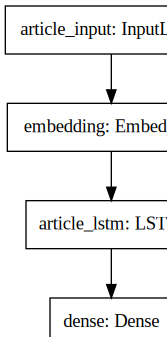

In [85]:
# Add sequential model
fnc_model = Sequential()


# Add embedding layer 
#Input length = 20 sentenses * 20 words / sentense = 400
#No of output dimenstions is 100 as we embedded with GloVe 100d
Embed_Layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(MAX_SEQUENCE_LENGTH,), trainable=True)
#Embed_Layer_head = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=(20,), trainable=False )

#define Inputs
article_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype= 'int32',name = 'article_input')
#heading_input = Input(shape=(MAX_LEN,),dtype= 'int32',name = 'heading_input')

#head_embedding = Embed_Layer(heading_input)

article_embedding = Embed_Layer(article_input)


#LSTM for article and head
#Embedding dimension is 100
article_lstm = LSTM(100, dropout=0.2,name='article_lstm',return_state=False)(article_embedding)

#encoded_states =[state_h,state_c,x,y]
#head_lstm1 = LSTM(100,dropout=0.2,name='head_lstm1',return_state=False)(head_embedding)
#head1 = LSTM(100,dropout=0.2,name='head1',return_state=True)
#Concatenate the lstm outputs
#concat = keras.layers.concatenate([article_lstm,head_lstm1])

output_size = 2
#Add a dense layer over concatinated layer
#article_d = Dense(100,activation='relu')(article_lstm)
#head_d = Dense(100,activation='relu')(head_lstm1)


#concat = keras.layers.concatenate(article_d, head_d)
dense1 = Dense(100,activation='relu')(article_lstm)
predict = Dense(2,activation='softmax')(dense1)

fnc_model = Model(inputs=[article_input],outputs=[predict])
fnc_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

print(fnc_model.summary())



SVG(model_to_dot(fnc_model).create(prog='dot', format='svg'))

In [86]:
fnc_model.fit(X_train,y_train,epochs= 5,batch_size=32,verbose=True,validation_data=(X_test,y_test))

Epoch 1/5
174/174 [==============================] - 79s 452ms/step - loss: 0.5224 - acc: 0.7428 - val_loss: 0.4614 - val_acc: 0.7947
Epoch 2/5
174/174 [==============================] - 82s 474ms/step - loss: 0.3519 - acc: 0.8562 - val_loss: 0.3259 - val_acc: 0.8559
Epoch 3/5
174/174 [==============================] - 83s 475ms/step - loss: 0.2526 - acc: 0.9030 - val_loss: 0.2995 - val_acc: 0.8624
Epoch 4/5
174/174 [==============================] - 83s 478ms/step - loss: 0.1812 - acc: 0.9339 - val_loss: 0.2926 - val_acc: 0.8696
Epoch 5/5
174/174 [==============================] - 82s 472ms/step - loss: 0.1295 - acc: 0.9524 - val_loss: 0.3349 - val_acc: 0.8646


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
article_input (InputLayer)   [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          2293600   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,474,702
Trainable params: 2,474,702
Non-trainable params: 0
_________________________________________________________________
None


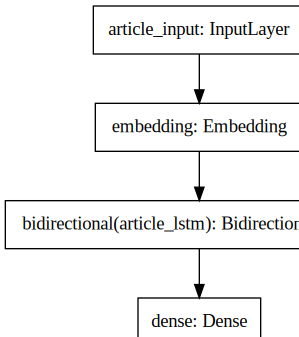

In [14]:
# Add sequential model
BiD_model = Sequential()


# Add embedding layer 
#Input length = 20 sentenses * 20 words / sentense = 400
#No of output dimenstions is 100 as we embedded with GloVe 100d
Embed_Layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(MAX_SEQUENCE_LENGTH,), trainable=True)
#Embed_Layer_head = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=(20,), trainable=False )

#define Inputs
article_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype= 'int32',name = 'article_input')
#heading_input = Input(shape=(MAX_LEN,),dtype= 'int32',name = 'heading_input')

#head_embedding = Embed_Layer(heading_input)

article_embedding = Embed_Layer(article_input)


#LSTM for article and head
#Embedding dimension is 100
article_lstm = Bidirectional(LSTM(100, dropout=0.2,name='article_lstm',return_state=False))(article_embedding)

#encoded_states =[state_h,state_c,x,y]
#head_lstm1 = LSTM(100,dropout=0.2,name='head_lstm1',return_state=False)(head_embedding)
#head1 = LSTM(100,dropout=0.2,name='head1',return_state=True)
#Concatenate the lstm outputs
#concat = keras.layers.concatenate([article_lstm,head_lstm1])

output_size = 2
#Add a dense layer over concatinated layer
#article_d = Dense(100,activation='relu')(article_lstm)
#head_d = Dense(100,activation='relu')(head_lstm1)


#concat = keras.layers.concatenate(article_d, head_d)
dense1 = Dense(100,activation='relu')(article_lstm)
predict = Dense(2,activation='softmax')(dense1)

BiD_model = Model(inputs=[article_input],outputs=[predict])
BiD_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

print(BiD_model.summary())



SVG(model_to_dot(BiD_model).create(prog='dot', format='svg'))

In [15]:
BiD_model.fit(X_train,y_train,epochs= 5,batch_size=32,verbose=True,validation_data=(X_test,y_test))

Epoch 1/5
174/174 [==============================] - 149s 857ms/step - loss: 0.5114 - acc: 0.7511 - val_loss: 0.4489 - val_acc: 0.8156
Epoch 2/5
174/174 [==============================] - 149s 853ms/step - loss: 0.3421 - acc: 0.8578 - val_loss: 0.3160 - val_acc: 0.8631
Epoch 3/5
174/174 [==============================] - 148s 849ms/step - loss: 0.2479 - acc: 0.9003 - val_loss: 0.2777 - val_acc: 0.8854
Epoch 4/5
174/174 [==============================] - 148s 852ms/step - loss: 0.1808 - acc: 0.9279 - val_loss: 0.2912 - val_acc: 0.8797
Epoch 5/5
174/174 [==============================] - 149s 856ms/step - loss: 0.1141 - acc: 0.9605 - val_loss: 0.3972 - val_acc: 0.8710


In [87]:
import os
import pandas as pd
#Load train bodies
val_path = os.path.join(project_path,'valid.tsv')
print(val_path)
df2 = pd.read_csv(val_path,sep='\t')
#print(val_text.head)
#print(train_text.head)
df2.columns = ['Id','Text','Label']
#df2 = val_text
print(df2)
val_texts = []


/content/drive/My Drive/DLCP/NLP/covid tweet/valid.tsv
                      Id  ...          Label
0    1235713405992030209  ...    INFORMATIVE
1    1245941302367305728  ...  UNINFORMATIVE
2    1245913002840391681  ...  UNINFORMATIVE
3    1240543259299987457  ...  UNINFORMATIVE
4    1244613970142662662  ...    INFORMATIVE
..                   ...  ...            ...
994  1245955124222099456  ...  UNINFORMATIVE
995  1241768801210904576  ...    INFORMATIVE
996  1241172153040502795  ...  UNINFORMATIVE
997  1239740620194766848  ...  UNINFORMATIVE
998  1236131066596986882  ...    INFORMATIVE

[999 rows x 3 columns]


In [88]:
df2.Text = df2.Text.str.lower()
# Removing http tags
df2.Text = df2.Text.str.replace(r'http(\S)+', r'')
df2.Text = df2.Text.str.replace(r'http ...', r'')

df2.Text = df2.Text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')
df2.Text = df2.Text.str.replace(r'#\S\w*',r'')
df2.Text[df2.Text.str.contains(r'RT[ ]?@')]
df2.Text = df2.Text.str.replace(r'@[\S]+',r'')

dft2 = df2["Text"]
count = dft2.count()
val_texts = []
for i in range (0,count):
  val_texts.append(dft2[i])

In [89]:
y_val = le.fit_transform(df2.Label)
y_val1 = to_categorical(np.asarray(y_val))

In [90]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(val_texts)
sequences = tokenizer.texts_to_sequences(val_texts)

valid_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [91]:
print(valid_data.shape)

(999, 500)


In [92]:
fnc_model.evaluate(
  valid_data,
  y_val1
)

32/32 [==============================] - 3s 83ms/step - loss: 1.1756 - acc: 0.5786


[1.175574541091919, 0.5785785913467407]

In [21]:
Embedded_val = Embed_Layer(valid_data)
print(Embedded_val.shape)

(999, 500, 100)


In [93]:
# Predict on the first 5 test messages.
predictions = fnc_model.predict(valid_data[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(y_val[:5]) 

[0 1 1 0 1]
[0 1 1 1 0]


In [96]:
print(val_texts[5])

cw | coronavirus i can’t see my dad for a week because he’s been in contact with someone who’s son is suspect to have covid-19 and we can’t take any chances of me contracting it because it would kill me but i’m so sad i just wanna hug my dad :(


In [ ]:
print(model_cV.summary())